# **EDA Team 18**

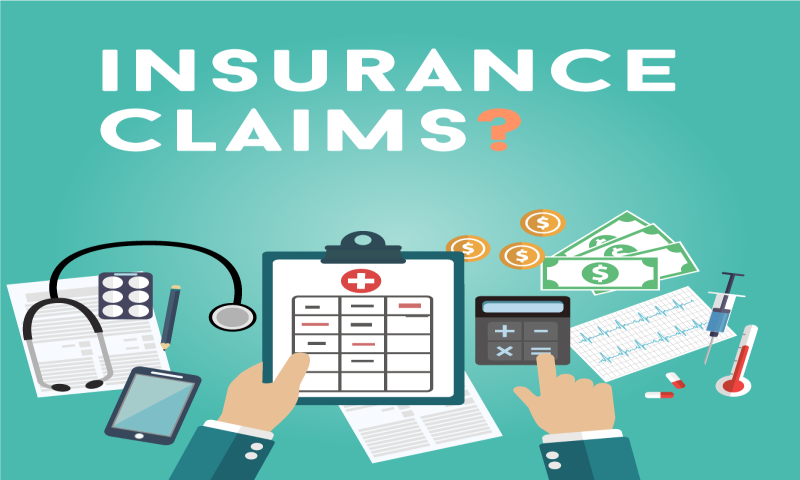

## **Project Overview**

The aim of this project is to predict the total claim amount per exposure, for specific risk profiles. A risk profile describes a policyholder (someone who is a client and owns a policy at the insurer), things like age, gender, marital status, etc The reason for doing this is so that the predicted claim can be used to calculate a premium for new applicants, based on their predicted risk. This way the insurer maximises profits by charging higher premiums for higher risk profiles. It is important to consider however that accompanying a higher premium, the insurer should maintain sensibility in deciding on a premium and still outcompete competitor insurers, which make business rules essential. 

## **Importing Libraries**

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
sns.set_style('darkgrid')

## **Loading DataSet**

In [68]:
insurance_data = pd.read_excel('DataSet.xlsx') #loadiing the dataset using pandas library
insurance_data.head() #shows us the first 5 rows of the dataset
pd.set_option('display.max_columns', None)

## **Creating a copy of the DataSet**
We create a copy of the Dataset so as not to temper with the orginal dataset

In [69]:
data = insurance_data.copy() #Creates a copy of the original data
data.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,EmploymentType,IsMemberPayer,Employer,Occupation,IndustryType,Gender,BirthDt,MaritalStatus,Make,Model,Colour,Transmission,VehicleType,BodyType,CubicCapacity,Cyl,Kilowatts,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,Area,MonthsSinceInception,DaysSinceInception,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,Permanent,1,NaN,Human Resource Consultant,Office / Clerical / Manager,Female,1966-11-22,Single,VOLKSWAGEN,POLO 1.4,grey,M,Auto,H/B,1390.0,4.0,62.0,2005.0,<5000 km,15+ years,KWAZULU-NATAL,Dolphin Coast,23.0,723.0,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,Permanent,1,NaN,Sale Rep,Government,Male,1992-08-31,Single,VOLKSWAGEN,POLO VIVO GP 1.4 CONCEPTLINE 5DR,silver,M,Auto,H/B,1398.0,4.0,55.0,2015.0,15000+ km,6 to 11 years,GAUTENG,PRETORIA,5.0,151.0,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,Permanent,1,NaN,Safety Officer,Office / Clerical / Manager,Female,1989-08-14,Single,VOLKSWAGEN,POLO VIVO 1.4 5Dr,white,M,Auto,H/B,1398.0,4.0,55.0,2014.0,5000 to 9999 km,6 to 11 years,MPUMALANGA,PRETORIA,NaN,NaN,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,Temporary / Casual,1,NaN,Cic support engineer,Other,Female,1991-02-17,Single,KIA,RIO 1.2 5DR,white,M,Auto,H/B,1248.0,4.0,62.0,2017.0,15000+ km,1 to 6 years,GAUTENG,NOORDWYK,26.0,800.0,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,Permanent,1,NaN,Correctional Officer,Government,Male,1976-01-23,Single,BMW,320i M SPORT (F30),blue,M,Auto,S/D,1998.0,4.0,135.0,2015.0,<5000 km,15+ years,EASTERN CAPE,NaN,3.0,96.0,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0


## **Information from DataSet**

In [4]:
data.info() #Tells us more about the dataset (e.g the dataype, number of non-null values etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 44 columns):
PolicyId                                262990 non-null int64
ClaimId                                 27478 non-null float64
SumTotalClaimAmount                     27392 non-null float64
CountTotalClaimAmount                   27478 non-null float64
PremiumSum                              262750 non-null float64
CasePremiumSum                          262750 non-null float64
PaymentDueDate                          262750 non-null datetime64[ns]
TotalPremiumPaymentCount                262750 non-null float64
PreviousInsurerExcess                   262963 non-null float64
PreviousInsurerPremium                  262961 non-null float64
EmploymentType                          260334 non-null object
IsMemberPayer                           262990 non-null int64
Employer                                7286 non-null object
Occupation                              260744 non-null objec

In [5]:
data.shape #Tells us the numbeer of rows and columns available in the dataset

(262990, 44)

The dataset has 262990 rows and 44 columns

In [6]:
data.describe().T#Gives us information more about the dataset (e.g mean, median, frequency, standard deviation etc)

,count,mean,std,min,25%,50%,75%,max
PolicyId,262990.0,1.084961e+07,51720.661654,10767844.0,1.080422e+07,1.084769e+07,1.089272e+07,10957895.00
ClaimId,27478.0,1.010507e+07,15069.963591,10073775.0,1.009240e+07,1.010566e+07,1.011831e+07,10129872.00
SumTotalClaimAmount,27392.0,4.059307e+04,65213.503869,0.0,3.415500e+03,1.391817e+04,4.461965e+04,1754000.00
CountTotalClaimAmount,27478.0,1.256787e+00,0.574605,0.0,1.000000e+00,1.000000e+00,1.000000e+00,9.00
PremiumSum,262750.0,4.589583e+03,3538.634556,0.0,1.988050e+03,3.568235e+03,6.351193e+03,41822.55
CasePremiumSum,262750.0,3.709207e+03,3718.507791,0.0,7.191375e+02,2.743360e+03,5.620938e+03,41822.55
TotalPremiumPaymentCount,262750.0,4.623604e+00,4.066673,0.0,1.000000e+00,4.000000e+00,7.000000e+00,14.00
PreviousInsurerExcess,262963.0,2.923134e+03,6031.299346,-1.0,0.000000e+00,0.000000e+00,5.000000e+03,800000.00
PreviousInsurerPremium,262961.0,5.767832e+02,654.862704,-1700.0,0.000000e+00,4.580000e+02,1.070000e+03,23000.00
IsMemberPayer,262990.0,9.662154e-01,0.180675,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.00


In [7]:
data.isnull().mean().sort_values(ascending=False)*100 # Tells the percentage of missing values from the dataset

Employer                                97.229552
SumTotalClaimAmount                     89.584395
ClaimId                                 89.551694
CountTotalClaimAmount                   89.551694
DaysSinceInception                      48.745580
PolicyEndDate                           48.745580
MonthsSinceInception                    48.745580
Area                                    25.515419
SumAssured                              15.992243
IndustryType                             1.570782
EmploymentType                           1.009924
Occupation                               0.854025
CasePremiumSum                           0.091258
PaymentDueDate                           0.091258
TotalPremiumPaymentCount                 0.091258
PremiumSum                               0.091258
PreviousInsurerPremium                   0.011027
PreviousInsurerExcess                    0.010267
Gender                                   0.003042
BirthDt                                  0.002281


We observe that the **97%** of the data points were missing from the **employee** column. The **SumTotalClaimAmount**, **ClaimId**,and **CountTotalClaimAmount** have **89%** missing values. It was observed other columns had less than **50%** of missing values with the **PolicyId** and **IsMemberPayer** columns having no missing value at all.

In [12]:
# infromation on Policy Status
policy_status = data['PolicyStatus'].value_counts()
perc = policy_status/policy_status.sum()*100
pc_sum = policy_status.sum()
print(pc_sum)
print(perc)
policy_status

262984
Active       43.219740
Cancelled    27.239680
Lapsed       24.015910
Pending       5.524671
Name: PolicyStatus, dtype: float64


Active       113661
Cancelled     71636
Lapsed        63158
Pending       14529
Name: PolicyStatus, dtype: int64

We observe that **43%** of the Policy holders had active policy status, meaning **113661** of the insurers had active policy insurance claims with **27%** of the the policy status cancelled, **24%** having elapsed and **5%** still pending comsideration.

In [11]:
Gender = data['Gender'].value_counts()
perc1 = Gender/Gender.sum()*100
gen_sum = Gender.sum()
print(gen_sum)
print(perc1)
Gender

262982
Male      65.282795
Female    34.717205
Name: Gender, dtype: float64


Male      171682
Female     91300
Name: Gender, dtype: int64

We observe that **65%** of people who own an insurance policy were of the **Male** gender while **34%** were females

In [10]:
MaritalStatus = data['MaritalStatus'].value_counts()
perc2 = MaritalStatus/MaritalStatus.sum()*100
ms_sum = MaritalStatus.sum()
print(ms_sum)
print(perc2)
MaritalStatus

262984
Single      50.799288
Married     42.974858
Divorced     4.211663
Widowed      2.014191
Name: MaritalStatus, dtype: float64


Single      133594
Married     113017
Divorced     11076
Widowed       5297
Name: MaritalStatus, dtype: int64

While **50%** of people who owned an insurance policy were single, **42%** of then were Married with **4%** being divorced and **2%** widowed.

## **Exploratory Data Analysis**

### **Data Cleaning**

We do some basic data cleaning process:
1. Create new columns: **Age** column from **BirthDt** and **Month_full** from **PaymentDueDate**
2. inputing 0 in place of NaN in the **SumTotalClaimAmount** and **CountTotalClaimAmount** columns

In [101]:
# Creating the Age column
now = pd.Timestamp('now')
data['BirthDt'] = pd.to_datetime(data['BirthDt'], format = '%m%d%y')
data['BirthDt'] = data['BirthDt'].where(data['BirthDt'] < now, data['BirthDt'] - np.timedelta64(100, 'Y'))
data['Age'] = (now - data['BirthDt']).astype('<m8[Y]')

In [102]:
# Creating the month column from the PaymentDueDate
data['month_full'] = data['PaymentDueDate'].dt.month_name().str[:3]
data['year'] = data['PaymentDueDate'].dt.year

In [103]:
#replacing NaN with 0
data = data.iloc[:,:-1]
data['SumTotalClaimAmount'].fillna(0, inplace=True)
data['CountTotalClaimAmount'].fillna(0, inplace=True)

In [48]:
data.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,Age,month_full
0,10806273,NaN,0.0,0.0,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0,55.0,Dec
1,10822247,NaN,0.0,0.0,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0,30.0,Sep
2,10941976,NaN,0.0,0.0,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0,33.0,Jul
3,10782539,NaN,0.0,0.0,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0,31.0,Aug
4,10916477,NaN,0.0,0.0,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0,46.0,Mar


## **Corelation**

In [58]:
columns=list(data.columns)
irr_var = ['PolicyId', 'ClaimId', 'VehicleYear']
rel_var = [i for i in columns if i not in irr_var]
data[rel_var].corr()

,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,CubicCapacity,...,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,Age,year
ClaimId,1.000000,-0.007204,0.027355,-0.122185,-0.075426,-0.155565,-0.015826,-0.042123,-0.025404,0.002193,...,-0.021405,0.038429,0.055201,0.413176,0.611641,0.093471,-0.082379,-0.066292,0.126564,0.868830
SumTotalClaimAmount,-0.007204,1.000000,0.553535,0.062766,0.062803,0.032719,0.016626,0.025488,0.002995,-0.011273,...,0.026788,0.058844,0.058158,0.013615,-0.041177,0.018144,-0.001243,0.011733,-0.046575,-0.040733
CountTotalClaimAmount,0.027355,0.553535,1.000000,0.219611,0.224151,0.199623,0.013259,0.028129,0.005359,-0.018159,...,0.160093,0.045395,0.053107,0.054557,0.025593,-0.020909,0.023299,0.027678,-0.054062,0.006469
PremiumSum,-0.122185,0.062766,0.219611,1.000000,0.929425,0.779827,0.066375,0.157109,0.009417,0.029850,...,0.534514,0.326275,0.303627,0.346171,0.177192,0.034578,0.100676,0.073290,-0.132144,0.109137
CasePremiumSum,-0.075426,0.062803,0.224151,0.929425,1.000000,0.883102,0.045597,0.107036,-0.000763,0.017296,...,0.612088,0.252367,0.259096,0.387786,0.293609,0.014279,0.117991,0.077908,-0.087400,0.202892
TotalPremiumPaymentCount,-0.155565,0.032719,0.199623,0.779827,0.883102,1.000000,-0.004766,-0.006639,-0.012016,-0.001139,...,0.676747,-0.016324,0.009930,0.193603,0.293913,-0.069833,0.145511,0.078316,0.021707,0.177837
PreviousInsurerExcess,-0.015826,0.016626,0.013259,0.066375,0.045597,-0.004766,1.000000,0.442726,0.026939,-0.062386,...,0.011492,0.117590,0.120901,0.081235,-0.013035,0.083602,-0.041376,-0.010484,-0.126472,-0.014561
PreviousInsurerPremium,-0.042123,0.025488,0.028129,0.157109,0.107036,-0.006639,0.442726,1.000000,0.045403,-0.054820,...,0.018161,0.279245,0.169071,0.114564,-0.036698,0.002855,-0.039142,-0.016626,-0.152412,-0.041352
IsMemberPayer,-0.025404,0.002995,0.005359,0.009417,-0.000763,-0.012016,0.026939,0.045403,1.000000,-0.015671,...,-0.006256,0.014238,0.016676,-0.004235,-0.027872,0.002051,-0.077356,-0.052299,-0.072955,-0.029196
CubicCapacity,0.002193,-0.011273,-0.018159,0.029850,0.017296,-0.001139,-0.062386,-0.054820,-0.015671,1.000000,...,-0.007432,0.243099,0.042146,0.013468,-0.028300,-0.046639,0.037027,-0.020122,0.234326,-0.020485


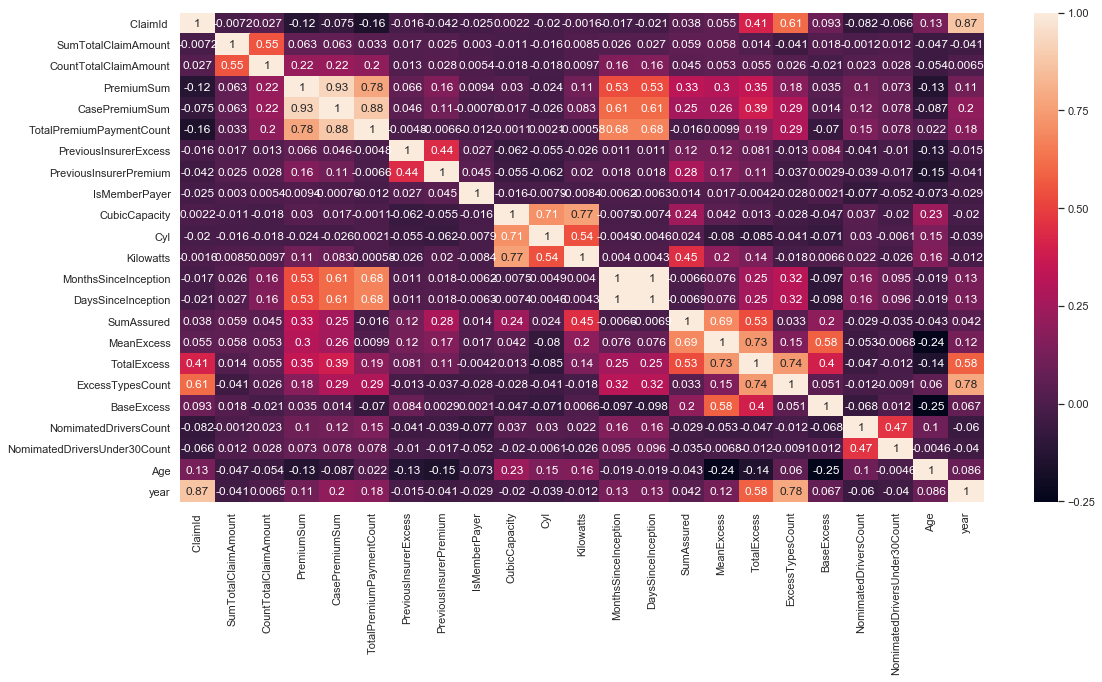

In [59]:
sns.set(rc = {'figure.figsize':(18,9)})
sns.heatmap(data[rel_var].corr(), annot=True)

### **Data Visualization**

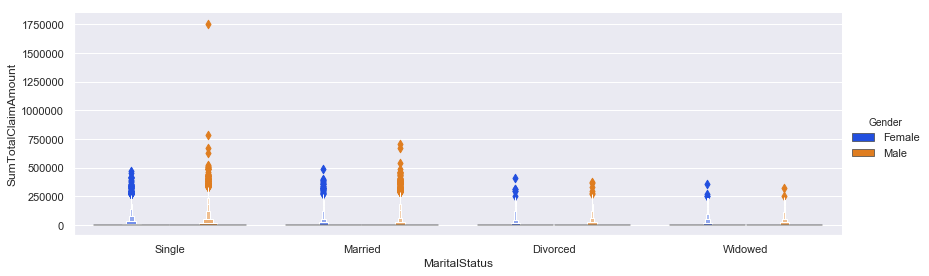

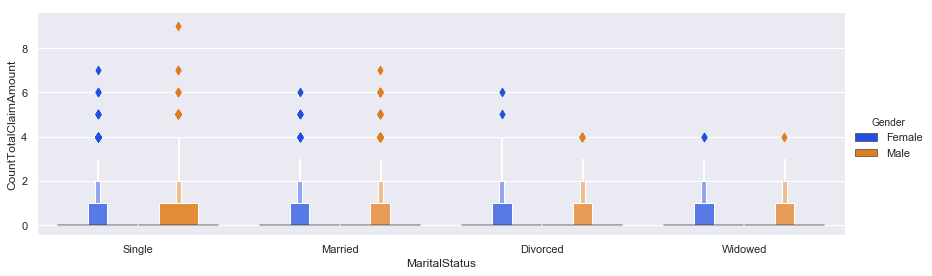

In [66]:
sns.catplot(x='MaritalStatus', y='SumTotalClaimAmount', hue='Gender', kind='boxen', data=data, palette='bright', height=4, aspect=3)
sns.catplot(x='MaritalStatus', y='CountTotalClaimAmount', hue='Gender',kind='boxen', data=data, palette='bright', height=4, aspect=3)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


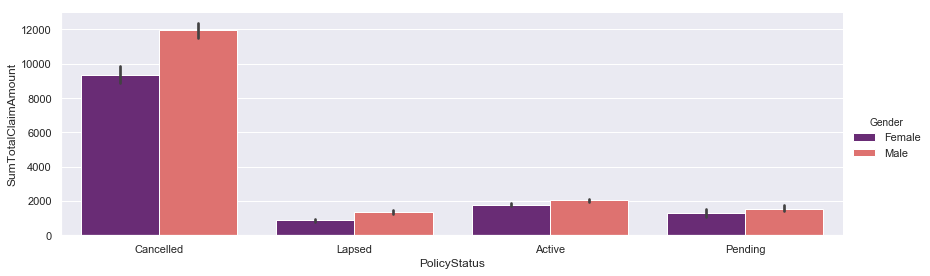

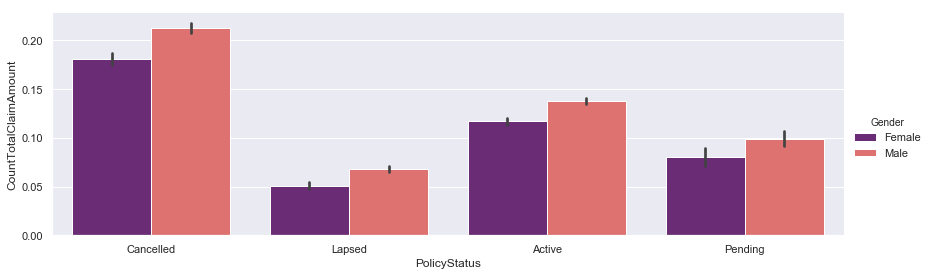

In [67]:
sns.catplot(x='PolicyStatus', y='SumTotalClaimAmount', hue='Gender', kind='bar', data=data, palette='magma',height=4, aspect=3)
sns.catplot(x='PolicyStatus', y='CountTotalClaimAmount', hue='Gender', kind='bar', data=data, palette='magma',height=4, aspect=3)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


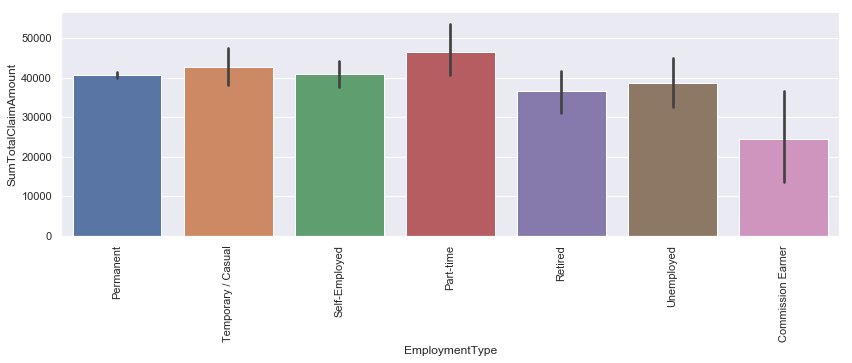

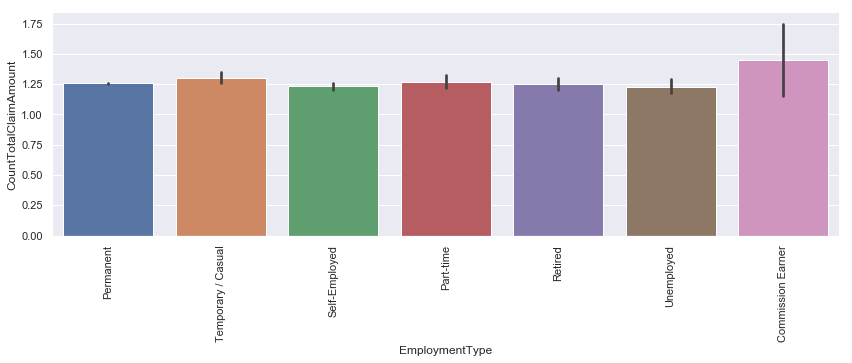

In [73]:
sns.catplot(x='EmploymentType', y = 'SumTotalClaimAmount', data=data, kind='bar', height=4, aspect=3)
plt.xticks(rotation=90)
sns.catplot(x='EmploymentType', y = 'CountTotalClaimAmount', data=data, kind='bar', height=4, aspect=3)
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


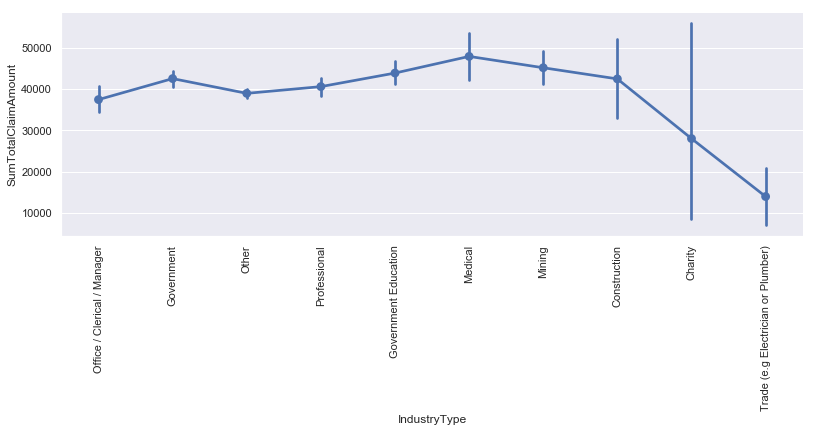

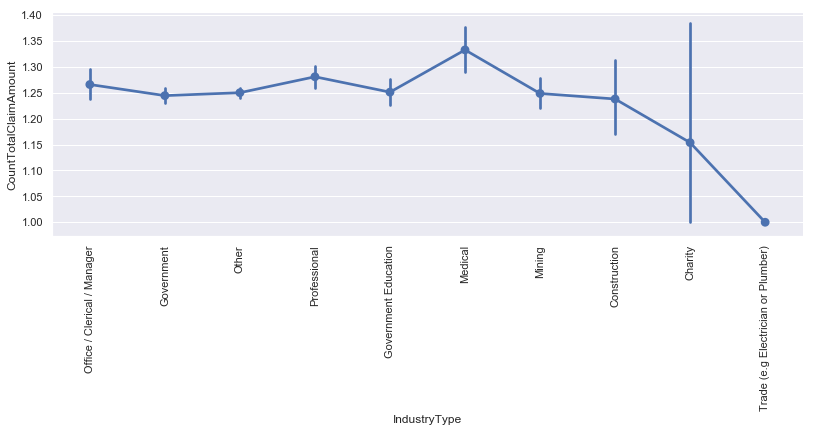

In [74]:
sns.catplot(x='IndustryType', y = 'SumTotalClaimAmount', data=data, kind='point', height=4, aspect=3)
plt.xticks(rotation=90)
sns.catplot(x='IndustryType', y = 'CountTotalClaimAmount', data=data, kind='point', height=4, aspect=3)
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


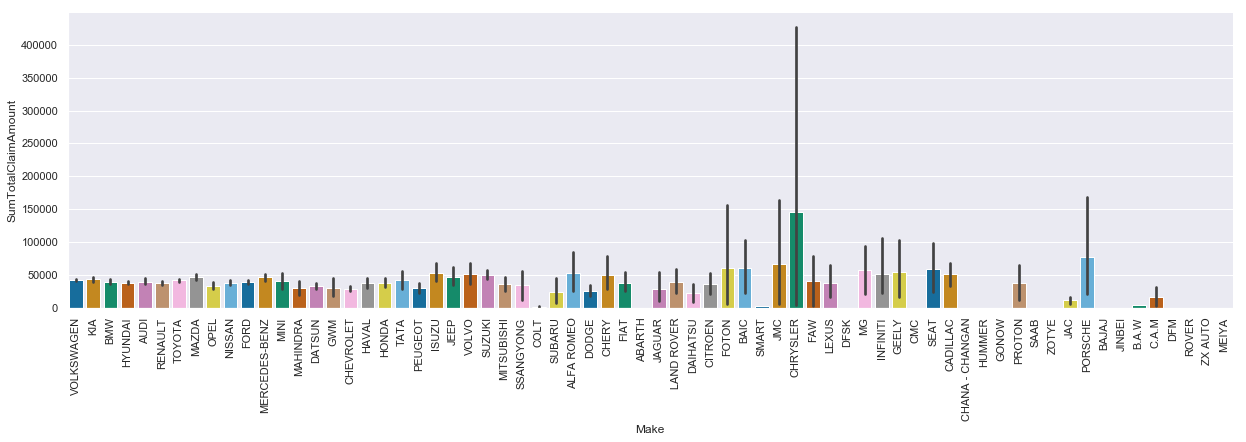

In [79]:
sns.catplot(x='Make', y = 'SumTotalClaimAmount', data=data, kind='bar', height=5, aspect=3.5, palette='colorblind')
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


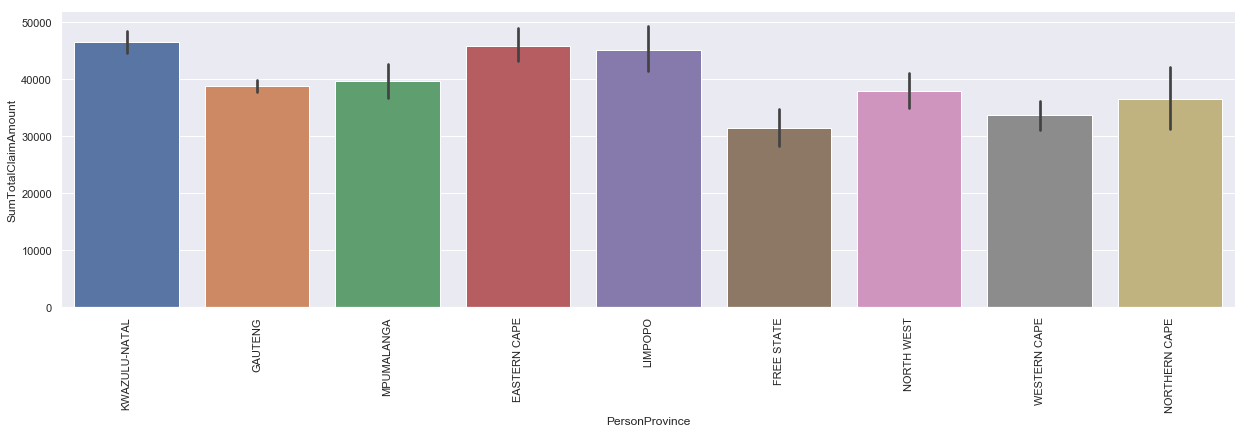

In [80]:
sns.catplot(x='PersonProvince', y = 'SumTotalClaimAmount', data=data, kind='bar', height=5, aspect=3.5)
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


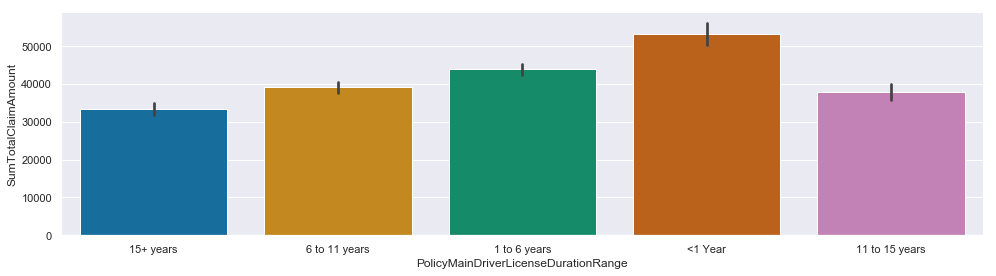

In [83]:
sns.catplot(x='PolicyMainDriverLicenseDurationRange', y='SumTotalClaimAmount', data=data, kind='bar', height=4, aspect=3.5, palette='colorblind')

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


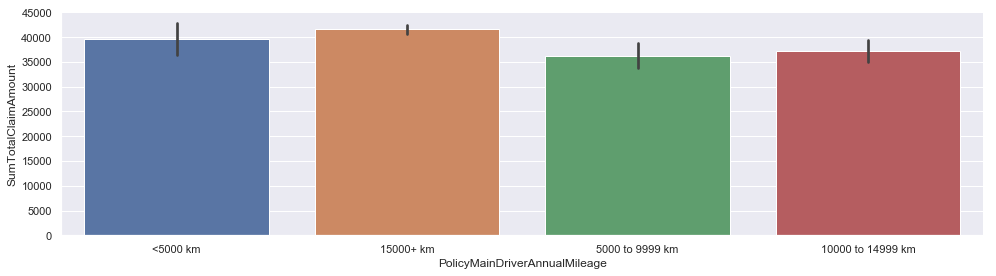

In [86]:
sns.catplot(x='PolicyMainDriverAnnualMileage', y='SumTotalClaimAmount', kind='bar', data=data, height=4, aspect=3.5)

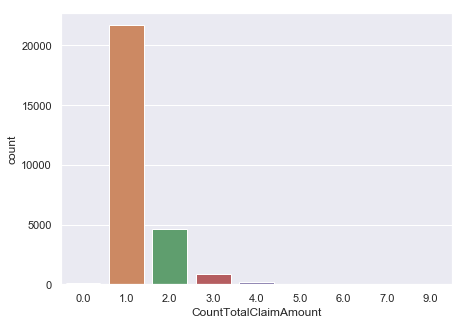

In [93]:
plt.figure(figsize=(7,5))
sns.countplot(x='CountTotalClaimAmount', data=data)
plt.show()

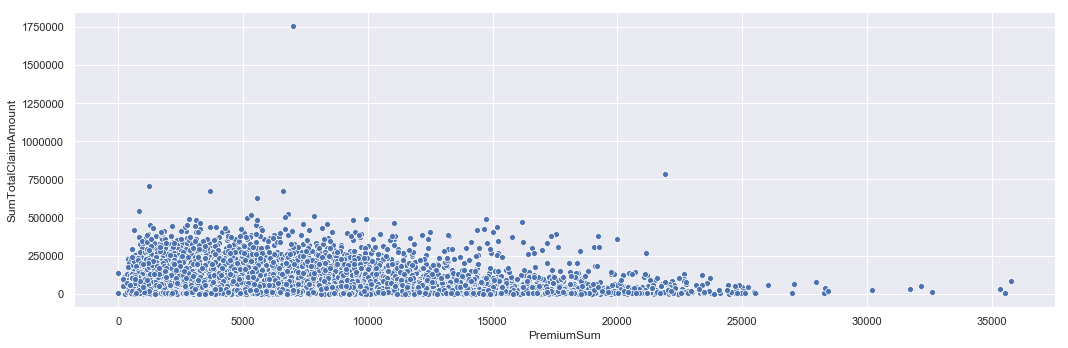

In [97]:
sns.relplot(x='PremiumSum', y='SumTotalClaimAmount', data=data, height=5, aspect=3)
plt.show()

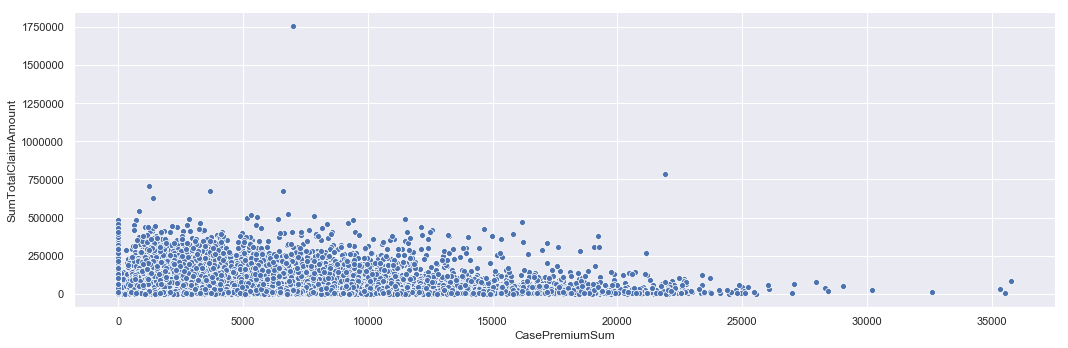

In [98]:
sns.relplot(x='CasePremiumSum', y='SumTotalClaimAmount', data=data, height=5, aspect=3)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


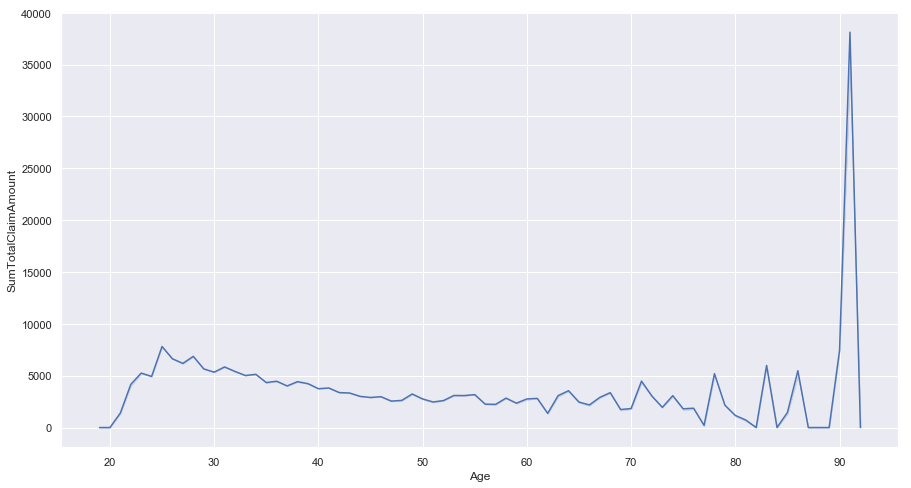

In [104]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Age', y='SumTotalClaimAmount', data=data, ci=0)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


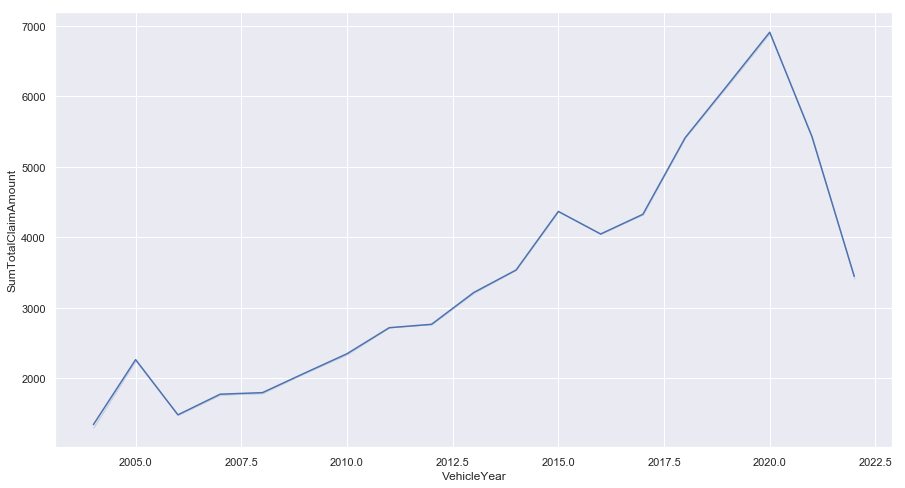

In [106]:
plt.figure(figsize=(15,8))
sns.lineplot(x='VehicleYear', y='SumTotalClaimAmount', data=data, ci=0)